In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
from keras.utils.vis_utils import plot_model

class DNN(keras.Sequential):
  def __init__(self, layer, units, activation, input_shape, dropout_rate, optimizer, loss):
    super().__init__()
    self.add(layers.Dense(units=units,activation=activation,input_shape=input_shape))
    #self.add(layers.Dropout(dropout_rate))
    #self.add(layers.BatchNormalization())
    for i in range(1,layer):
      self.add(layers.Dense(units=units,activation=activation))
      #self.add(layers.Dropout(dropout_rate))
      #self.add(layers.BatchNormalization())
    self.add(layers.Dense(units=1))
    self.compile(optimizer=optimizer,loss=loss)

def month_day(month):
  if month == 2:
    return 28
  elif month < 8:
    return 30+month%2
  else:
    return 31-month%2
def day_count(month):
  sum = 0
  for i in range(1,month):
    sum += month_day(i)
  return sum

def load_data_set(data):
  col_name = list(data.columns)
  col_name.pop(0)
  _X=[]
  _y=[]
  x_values=[]
  y_values=[]
  for i in range(0,len(col_name)):
    date = col_name[i]
    y_values = list(data[date])
    x_values = date.split('-')
    x_values = [int(x) for x in x_values]
    for j in range(0,24):
      sum=0
      if y_values[j] == 0 :
        continue
      if y_values[j] > 28000:
        print(x_values)
      sum += (x_values[0] - 2020)*8760 + 24 + day_count(x_values[1])*24 + (x_values[2]-1)*24 + j
      _X.append(sum)
      _y.append(y_values[j])
  return _X,_y

def group_split(X,y,train_size):
  X_train = []
  y_train = []
  X_val = []
  y_val = []
  for i in range(0,1000):
    random = np.random.uniform(0,1)
    if random < train_size:
      X_train.append(X[i])
      y_train.append(y[i])
    else:
      X_val.append(X[i])
      y_val.append(y[i])
  return X_train, y_train, X_val, y_val 

def load_temp_set(data):
  col_name = list(data.columns)
  date = col_name[0]
  temp = col_name[1]
  rain = col_name[2]
  wind = col_name[3]
  humid = col_name[4]
  sunshine = col_name[5]
  radiation = col_name[6]
  cloud = col_name[7]
  date_set = list(data[date])
  temp_set = list(data[temp])
  rain_set = list(data[rain])
  wind_set = list(data[wind])
  humid_set = list(data[humid])
  sunshine_set = list(data[sunshine])
  radiation_set = list(data[radiation])
  cloud_set = list(data[cloud])

  date_sum = []
  for i in date_set:
    sum = 0
    a = i.split(' ')
    date = a[0].split('-')
    date = [int(x) for x in date]
    sum += (date[0] - 2020)*8760 + 24 + day_count(date[1])*24 + (date[2]-1)*24
    hour = a[1].split(':')
    hour = [int(x) for x in hour]
    sum += hour[0]
    date_sum.append(sum)
  return date_sum,temp_set,rain_set,wind_set,humid_set,sunshine_set,radiation_set,cloud_set

def combine_set(x,y,date,temp,rain,wind,humid,sunshine,radiation,cloud):
  _X = {0:'0'}
  _y = {0:'0'}
  for i in range(len(x)):
    p = x[i]
    _X[p] = [p]
    _y[p] = y[i]
  for i in range(len(date)):
    p = date[i]
    if p in _X:
      _X[p].append(temp[i])
      _X[p].append(rain[i])
      _X[p].append(wind[i])
      _X[p].append(humid[i])
      _X[p].append(sunshine[i])
      _X[p].append(radiation[i])
      _X[p].append(cloud[i])

  return _X,_y

def filtering_set(x,y):
  _X=[]
  _y=[]
  for i in x:
    if i==0 or len(x[i])==1:
      continue
    _X.append(x[i])
    _y.append(y[i])
  return _X,_y


load_data = pd.read_csv('/content/sol_generated_power.csv')
load_temp = pd.read_csv('/content/solar_generation_input.csv',encoding='cp949')
load_temp = load_temp.fillna(0)

layer = 9
units = 128
activation = 'relu'
train_size = 0.75
input_shape= [8]
dropout_rate = 0.5
optimizer = 'adam'
loss = 'mae'

batch_size = 1
epochs = 100

data_X, data_y = load_data_set(load_data)

date_set,temp_set,rain_set,wind_set,humid_set,sunshine_set,radiation_set,cloud_set = load_temp_set(load_temp)
print(date_set[0])
raw_X,raw_y = combine_set(data_X,data_y,date_set,temp_set,rain_set,wind_set,humid_set,sunshine_set,radiation_set,cloud_set)
print(len(raw_X))
X,y = filtering_set(raw_X,raw_y)
print(len(X))
print(X)
X_train, y_train, X_val, y_val = group_split(X, y, train_size)

model = DNN(layer,units,activation,input_shape,dropout_rate,optimizer,loss)
#print(model)
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


3649
10103
10102
[[3654, 18.7, 0.0, 0.9, 96.0, 0.0, 0.06, 10.0], [3655, 18.9, 0.0, 0.4, 95.0, 0.0, 0.28, 7.0], [3656, 19.6, 0.0, 0.7, 91.0, 0.0, 0.64, 8.0], [3657, 20.1, 0.0, 1.2, 88.0, 0.1, 0.72, 10.0], [3658, 20.9, 0.0, 0.9, 78.0, 0.1, 1.25, 8.0], [3659, 23.1, 0.0, 1.2, 64.0, 1.0, 3.03, 4.0], [3660, 23.5, 0.0, 1.8, 52.0, 1.0, 3.66, 2.0], [3661, 25.2, 0.0, 1.5, 43.0, 1.0, 3.71, 0.0], [3662, 25.5, 0.0, 2.2, 39.0, 1.0, 3.65, 0.0], [3663, 25.9, 0.0, 2.3, 33.0, 1.0, 3.31, 0.0], [3664, 25.4, 0.0, 2.0, 27.0, 1.0, 2.75, 3.0], [3665, 24.9, 0.0, 2.7, 28.0, 1.0, 2.08, 0.0], [3666, 24.5, 0.0, 1.7, 25.0, 1.0, 1.41, 0.0], [3667, 22.7, 0.0, 1.1, 43.0, 0.7, 0.61, 0.0], [3668, 21.0, 0.0, 1.8, 47.0, 0.2, 0.11, 0.0], [3678, 14.8, 0.0, 0.4, 90.0, 0.0, 0.1, 8.0], [3679, 15.6, 0.0, 0.2, 82.0, 0.1, 0.33, 9.0], [3680, 17.4, 0.0, 0.2, 68.0, 0.5, 0.88, 8.0], [3681, 20.2, 0.0, 0.6, 53.0, 1.0, 1.93, 3.0], [3682, 22.1, 0.0, 1.0, 41.0, 1.0, 2.71, 1.0], [3683, 25.6, 0.0, 2.8, 36.0, 1.0, 3.22, 5.0], [3684, 26.3, 0.

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=batch_size,
    epochs=epochs,
    verbose=0, # suppress output since we'll plot the curves
)

Minimum Validation Loss: 60.5818


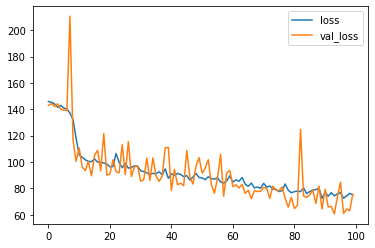

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [22]:
model.save('model1')

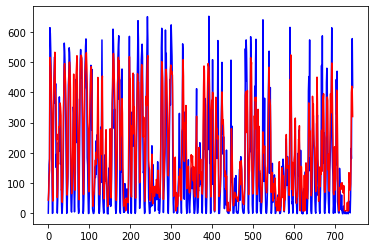

In [23]:
new_model = keras.models.load_model('model1')

import matplotlib.pyplot as plt
predict = model.predict(X_train)
plt.plot(y_train,'b')
plt.plot(predict,'r')


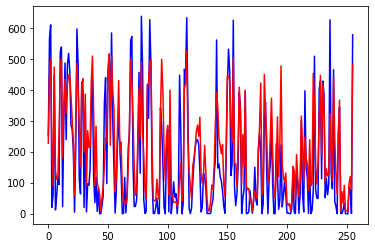

In [24]:
predict = model.predict(X_val)
plt.plot(y_val,'b')
plt.plot(predict,'r')